# Handwritten Digit Recognition using Neural Network

## Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load and Explore the Dataset

In [3]:
train_data = pd.read_csv('Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


## Step 3: Preprocess the Data

In [5]:
if not isinstance(X,pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric,errors = "coerce")
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28,28,1)
print("Shape of X after Reshaping:", X.shape)

Shape of X after Reshaping: (42000, 28, 28, 1)


## Step 4: One-Hot Encode the Labels

In [6]:
y = to_categorical(y, num_classes = 10)
print("Shape of y after  one-hot encoding:", y.shape)

Shape of y after  one-hot encoding: (42000, 10)


## Step 6: Build the Neural Network Model

In [12]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Keras will automatically split the last 20% for validation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1037 - loss: 2.3589 - val_accuracy: 0.0800 - val_loss: 2.3886
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1213 - loss: 2.3009 - val_accuracy: 0.1050 - val_loss: 2.3526
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1500 - loss: 2.2581 - val_accuracy: 0.0900 - val_loss: 2.3372
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2163 - loss: 2.2114 - val_accuracy: 0.1150 - val_loss: 2.3669
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2362 - loss: 2.1789 - val_accuracy: 0.1100 - val_loss: 2.4464
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2300 - loss: 2.1533 - val_accuracy: 0.0900 - val_loss: 2.3985
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3100 - loss: 2.0615 - val_accuracy: 0.0950 - val_loss: 2.4098
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3725 - loss: 1.9599 - val_accuracy: 0.0950 - v

## Step 8: Evaluate the Model

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4450 - loss: 1.8704 
Validation Accuracy: 44.50%


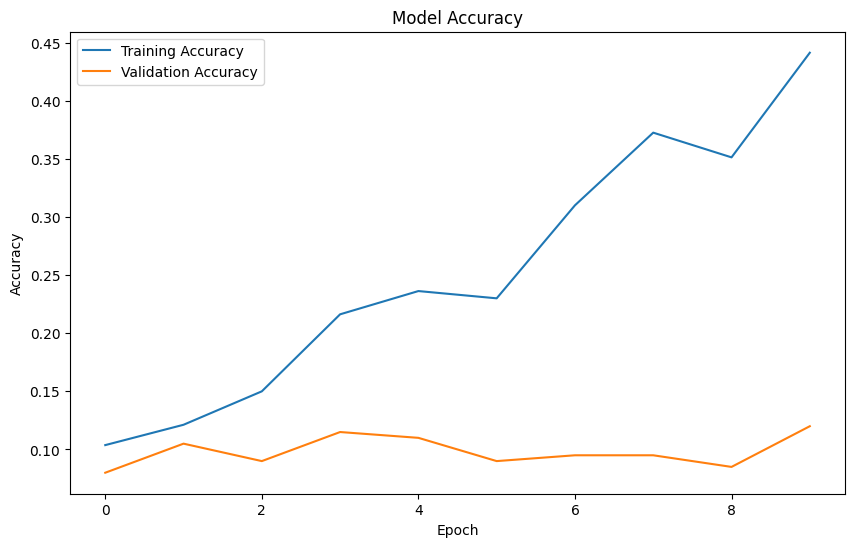

In [17]:
from sklearn.model_selection import train_test_split

# Split your training data to create validation set
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Now evaluate
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()